<a href="https://colab.research.google.com/github/John-Peter-R/ML/blob/main/Diabetes_prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**Diabetes Prediction**

Diabetes is a chronic condition in which the body develops a resistance to insulin, a hormone which converts food into glucose. Diabetes affect many people worldwide and is normally divided into Type 1 and Type 2 diabetes. Both have different characteristics. My project is to create a model on the PIMA Indian Diabetes dataset to predict if a particular observation is at a risk of developing diabetes, given the independent factors. 

Models Build

RandomForestClassifier    
Decision Tree    
LogisticRegression    
Naïve Bayes    
XGBClassifier    
KNeighborsClassifier    
SVM 




In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


The dataset can be found on the Kaggle website. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases and can be used to predict whether a patient has diabetes based on certain diagnostic factors.

In [ ]:
#Dataset
diabetesdata=pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df=diabetesdata

In [ ]:
x=df.iloc[:,:-1].values
y=df['Outcome'].values
print(x)
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

Carrying out the Exploratory Data Analysis to get an overview of the Dataset

In [ ]:
#to display the 1st five rows of dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#to display the last five rows
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# to see if there is any duplicate values in the dataset
df.duplicated().sum()

0

In [ ]:
#to see the datatypes in the dataset
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
#To see the no. of rows and columns
df.shape

(768, 9)

In [ ]:
#Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
#to see the columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

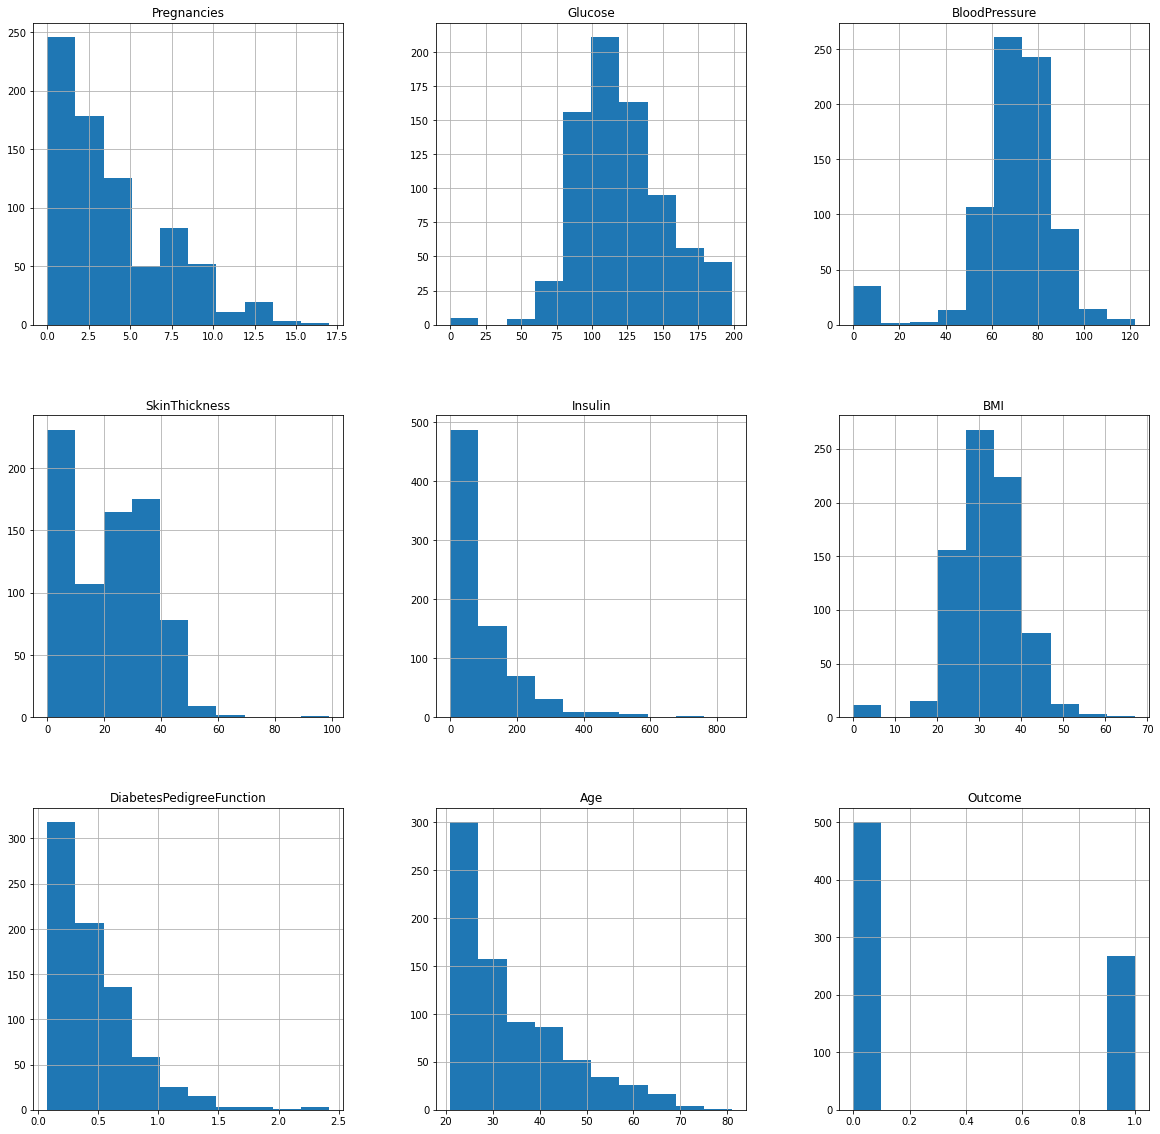

In [ ]:
p=df.hist(figsize = (20,20))

In [ ]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.nan)
df[df==0].count()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)
#df['Pregnancies'].fillna(df['Pregnancies'].median(), inplace = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


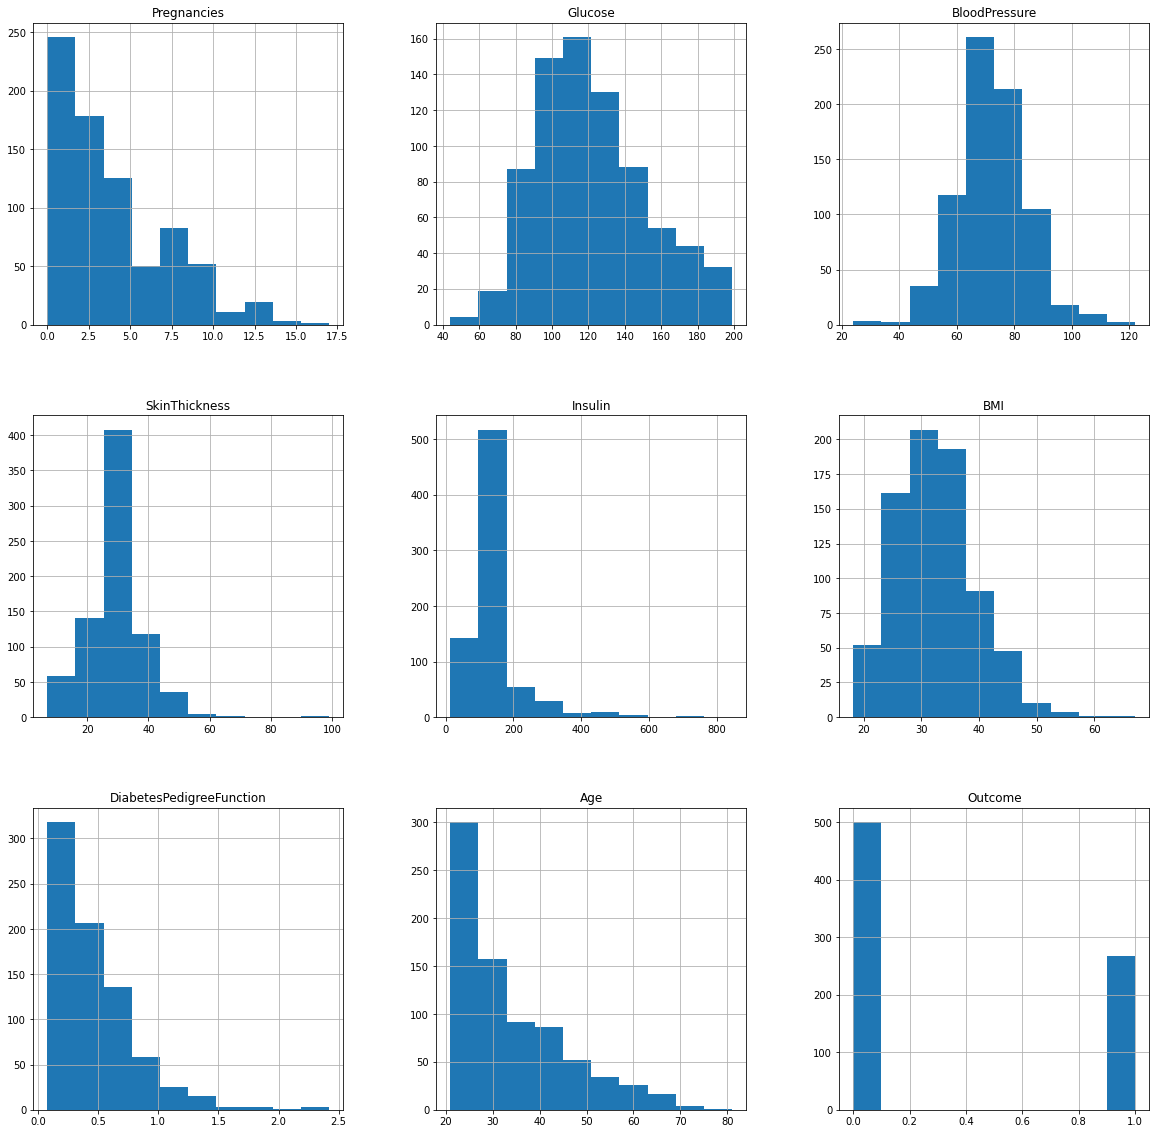

In [ ]:
p=df.hist(figsize = (20,20))

Here we are again using the hist plot to see the distribution of the dataset but this time we are using this visualization to see the changes that we can see after those null values are removed from the dataset and we can clearly see the difference for example – In age column after removal of the null values, we can see that there is a spike at the range of 50 to 100 which is quite logical as well.

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

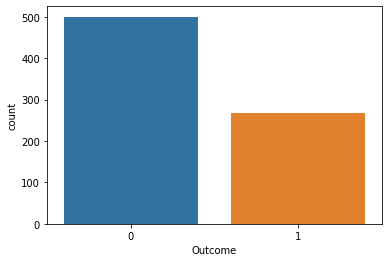

In [ ]:
sns.countplot(x = "Outcome", data = df)

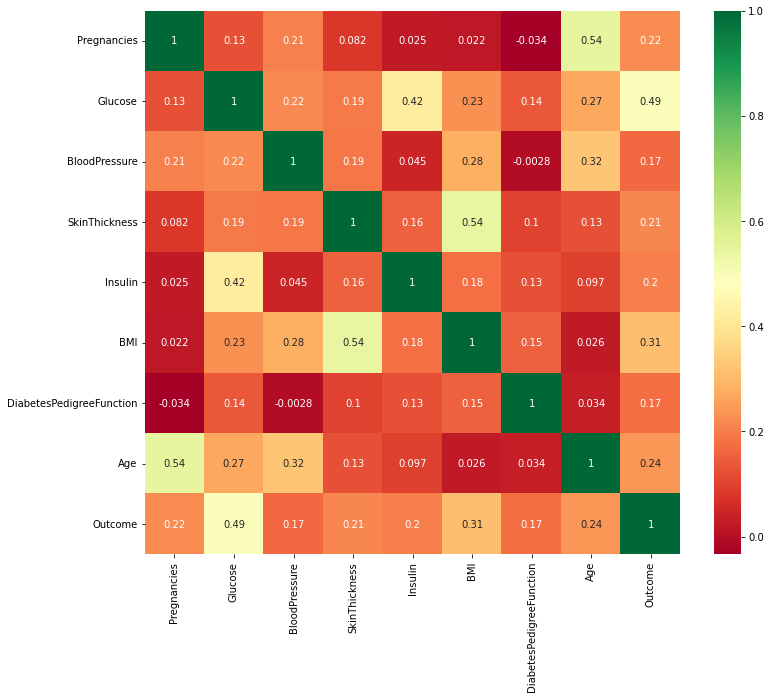

In [ ]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

From the above heatmap we can see that features such as Pregnancies, Glucose, BMI and Age are more correlated to the outcome

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
print(X)


[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale. 
The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1

That’s how our dataset will be looking like when it is scaled down or we can see every value now is on the same scale which will help our ML model to give a better result


In [ ]:
#splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=0)


We now split our processed dataset into Training and Test data. The Test data size is take to be 15% of the entire data (which means 115 observations) and the model will be trained on 653 observations.

The Random forest classifier creates multiple decision tree from our selected subset of training dataset.Then it aggregates the votes from different decision trees to decide the final class of test object

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
#training set accuracy
rfc_train = rfc.predict(X_train)
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))
#model accuracy
prediction = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, prediction)))
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

Accuracy_Score = 1.0
Accuracy_Score = 0.8008658008658008
[[142  15]
 [ 31  43]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.74      0.58      0.65        74

    accuracy                           0.80       231
   macro avg       0.78      0.74      0.76       231
weighted avg       0.80      0.80      0.79       231



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


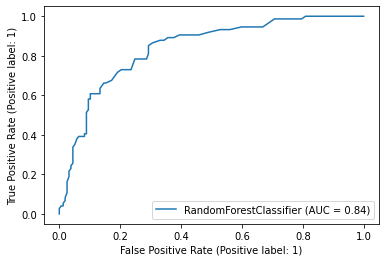

In [ ]:
from sklearn.metrics import  roc_auc_score, plot_roc_curve
plot_roc_curve(rfc,X_test,y_test)
plt.show()
#print(f"Auc: {round(roc_auc_score(prediction, y_test),1)*100}")

A Decision Tree is works on the principle of decision making. It can be described in form of tree and provides
high accuracy and stability.
The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

A tree can be seen as a piecewise constant approximation.

In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

Accuracy Score = 0.70995670995671
[[120  37]
 [ 30  44]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       157
           1       0.54      0.59      0.57        74

    accuracy                           0.71       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.72      0.71      0.71       231



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


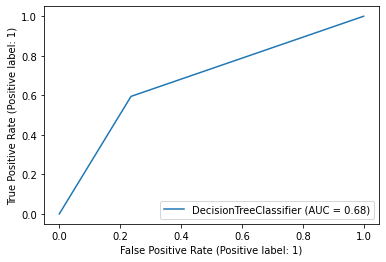

ROC Score: 67.16049382716051


In [ ]:
import sklearn

from sklearn.metrics import  roc_auc_score, plot_roc_curve
plot_roc_curve(dtree,X_test,y_test)
plt.show()
a=roc_auc_score(predictions,y_test)
print('ROC Score:',a*100)

In [ ]:
#training the logistic regression
from sklearn.linear_model import LogisticRegression
loreg=LogisticRegression()
lcf=LogisticRegression().fit(X_train,y_train)
lcf.intercept_
predic = lcf.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predic)))

# Predicting the Test set results
cm = confusion_matrix(y_test, predic)
print(cm)
print(classification_report(y_test,predic))


Accuracy_Score = 0.7792207792207793
[[141  16]
 [ 35  39]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



In [ ]:
import sklearn

from sklearn.metrics import  roc_auc_score, plot_roc_curve
print(f"Auc Score: {round(roc_auc_score(predic, y_test),1)*100}")
a=roc_auc_score(predic,y_test)
print('ROC Score:',a*100)

Auc Score: 80.0
ROC Score: 75.51136363636364


Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.

In [ ]:
from sklearn.naive_bayes import GaussianNB
Nbp = GaussianNB()
Nbp.fit(X_train, y_train)
ypred=Nbp.predict(X_test)
#predicting using the test set
print("Accuracy Score =", format(metrics.accuracy_score(y_test,ypred)))

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, ypred))
print(classification_report(y_test,ypred))

Accuracy Score = 0.7619047619047619
[[138  19]
 [ 36  38]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.67      0.51      0.58        74

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


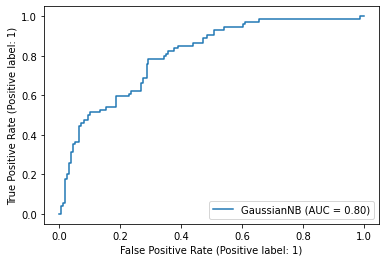

ROC Score: 72.98850574712642


In [ ]:
import sklearn

from sklearn.metrics import  roc_auc_score, plot_roc_curve
plot_roc_curve(Nbp,X_test,y_test)
plt.show()
a=roc_auc_score(ypred,y_test)
print('ROC Score:',a*100)
#print(f"Auc Score: {round(roc_auc_score(ypred, y_test),1)*100}")

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

The models that form the ensemble, also known as base learners, could be either from the same learning algorithm or different learning algorithms. Bagging and boosting are two widely used ensemble learners. Though these two techniques can be used with several statistical models, the most predominant usage has been with decision trees.



In [ ]:
#XGBClassifier
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
from sklearn import metrics

xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test,xgb_pred))

Accuracy Score = 0.7748917748917749
[[133  24]
 [ 28  46]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       157
           1       0.66      0.62      0.64        74

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


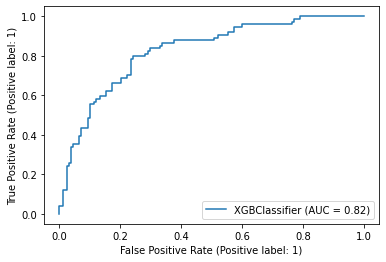

AUC Score: 82
ROC Score: 74.16149068322981


In [ ]:
import sklearn

from sklearn.metrics import  roc_auc_score, plot_roc_curve
plot_roc_curve(xgb_model,X_test,y_test)
plt.show()
a=roc_auc_score(xgb_pred,y_test)
print('AUC Score: 82')
print('ROC Score:',a*100)
#print(f"Auc Score: {round(roc_auc_score(xgb_pred, y_test),1)*100}")

KNN (K-Nearest Neighbor) is a simple supervised classification algorithm we can use to assign a class to new data point. It can be used for regression as well, KNN does not make any assumptions on the data distribution, hence it is non-parametric. It keeps all the training data to make future predictions by computing the similarity between an input sample and each training instance.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
from sklearn.metrics import classification_report, confusion_matrix
knn.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
ypredi = knn.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, ypredi)))
print(classification_report(y_test,ypredi))
print(confusion_matrix(y_test, ypredi))


Accuracy Score = 0.7142857142857143
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       157
           1       0.62      0.27      0.38        74

    accuracy                           0.71       231
   macro avg       0.68      0.60      0.60       231
weighted avg       0.70      0.71      0.67       231

[[145  12]
 [ 54  20]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


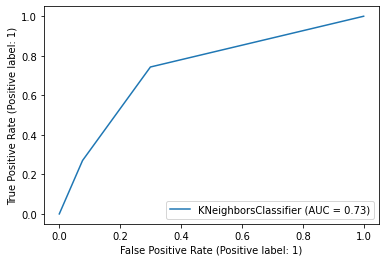

ROC Score: 72.98850574712642
Auc Score: 70.0


In [ ]:
import sklearn

from sklearn.metrics import  roc_auc_score, plot_roc_curve
plot_roc_curve(knn,X_test,y_test)
plt.show()
a=roc_auc_score(ypred,y_test)
print('ROC Score:',a*100)
print(f"Auc Score: {round(roc_auc_score(ypred, y_test),1)*100}")

SVM is a supervised classifier in machine learning algorithms that can be used both for regression and
classification. It is majorly applied in solving classification problems
This best decision boundary is called a hyperplane

In [ ]:
from sklearn import svm
SVM = svm.SVC(kernel='linear')
SVM.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
from sklearn import svm
svc_model= svm.SVC(kernel='linear')

svc_model =svc_model.fit(X_train, y_train)

svc_pred = svc_model.predict(X_test)

from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred)) 
print(classification_report(y_test,svc_pred))

Accuracy Score = 0.7835497835497836
[[141  16]
 [ 34  40]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.71      0.54      0.62        74

    accuracy                           0.78       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.78      0.78      0.77       231



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


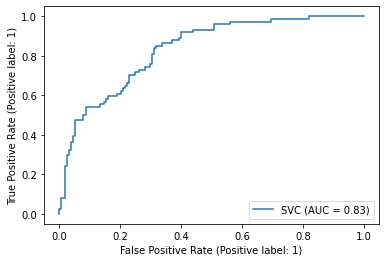

ROC Score: 76.0
Auc Score: 80.0


In [ ]:
import sklearn

from sklearn.metrics import  roc_auc_score, plot_roc_curve
plot_roc_curve(svc_model,X_test,y_test)
plt.show()
a=roc_auc_score(svc_pred,y_test)
print('ROC Score:',a*100)
print(f"Auc Score: {round(roc_auc_score(svc_pred, y_test),1)*100}")

In [ ]:
#Data
data = [['RandomForestClassifier',(metrics.accuracy_score(y_test, prediction))*100,(confusion_matrix(y_test, prediction)),roc_auc_score(prediction,y_test)*100],
        ['Decision Tree', (metrics.accuracy_score(y_test, predic))*100,(confusion_matrix(y_test, predic)),roc_auc_score(predic,y_test)*100],
        [' LogisticRegression', (metrics.accuracy_score(y_test, predictions))*100,(confusion_matrix(y_test, predictions)),roc_auc_score(predictions,y_test)*100],
        ['Naïve Bayes', (metrics.accuracy_score(y_test, ypred))*100,(confusion_matrix(y_test, ypred)),roc_auc_score(ypred,y_test)*100],
        ['XGBClassifier', (metrics.accuracy_score(y_test, xgb_pred))*100,(confusion_matrix(y_test, xgb_pred)),roc_auc_score(xgb_pred,y_test)*100]
        ,['KNeighborsClassifier',(metrics.accuracy_score(y_test, ypredi))*100,(confusion_matrix(y_test, ypredi)),roc_auc_score(ypredi,y_test)*100],
        ['SVM', (metrics.accuracy_score(y_test, svc_pred))*100,(confusion_matrix(y_test, svc_pred)),roc_auc_score(svc_pred,y_test)*100]]
 
# Create the pandas DataFrame
dat = pd.DataFrame(data, columns = ['Model', 'Accuracy Score','Confusion Matrix','ROC score'])
dat


,Model,Accuracy Score,Confusion Matrix,ROC score
0,RandomForestClassifier,80.086580,"[[142, 15], [31, 43]]",78.109428
1,Decision Tree,77.922078,"[[141, 16], [35, 39]]",75.511364
2,LogisticRegression,70.995671,"[[120, 37], [30, 44]]",67.160494
3,Naïve Bayes,76.190476,"[[138, 19], [36, 38]]",72.988506
4,XGBClassifier,77.489177,"[[133, 24], [28, 46]]",74.161491
5,KNeighborsClassifier,71.428571,"[[145, 12], [54, 20]]",67.682161
6,SVM,78.354978,"[[141, 16], [34, 40]]",76.000000


In [ ]:
rfc.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

array([0])

array([0])

In [ ]:
print("Enter the values of the following parameters: ")
pregnancies = int(input("Pregnancies: "))
glucose = float(input("Glucose: "))
bp = float(input("Blood Pressure: "))
st = float(input("Skin Thickness: "))
insulin = float(input("Insulin: "))
bmi = float(input("BMI: "))
dbf = float(input("Diabetes Pedigree Function: "))
age = int(input("Age :"))

input_data = [[pregnancies, glucose, bp, st, insulin, bmi, dbf, age]]
#input_data = [[0, 137, 40, 35, 168, 43.1, 2.288, 33]]

diab = rfc.predict(input_data)
print(diab)
if diab==[1]:
 print('Diabetic')
else:
 print('NonDiabetic')



Enter the values of the following parameters: 
Pregnancies: 0
Glucose: 191
Blood Pressure: 340
Skin Thickness: 0
Insulin: 160
BMI: 52
Diabetes Pedigree Function: 0
Age :48
[1]
Diabetic


*Saving  the model*

##**Conclusion**
We thus select the Random Forest Classifier as the right model due to high accuracy, precision and recall score. One reason why Random Forest Classifier showed an improved performance was because of the presence of outliers. As mentioned before, since Random Forest is not a a distance based algorithm, it is not much affected by outliers, whereas distance based algorithm such as Logistic Regression and Support Vector showed a lower performance.


Based on the feature importance:
Glucose is the most important factor in determining the onset of diabetes followed by BMI and Age.
Other factors such as Diabetes Pedigree Function, Pregnancies, Blood Pressure, Skin Thickness and Insulin also contributes to the prediction.